In [46]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")


In [47]:
# Criando o DataFrame
df = pd.read_csv("data/application_record.csv")


In [48]:
# Visualizando as 5 primeiras linhas
df.head()


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [49]:
# Estatísticas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [50]:
# Quantidade de linhas e colunas
df.shape


(438557, 18)

In [51]:
# Verificando os tipos de dados
df.dtypes


ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [52]:
# Verificando se temos dados faltantes
df.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [53]:
# Verificando os dados da coluna OCCUPATION_TYPE
df.OCCUPATION_TYPE.sample(5)


264685                 Managers
157762           Security staff
208594                 Managers
425664                      NaN
67567     Private service staff
Name: OCCUPATION_TYPE, dtype: object

In [54]:
# Removendo os dados nulos
df.dropna(axis=0, inplace=True)


In [55]:
# Verificando se temos dados faltantes
df.isnull().sum()


ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [56]:
# Checando os ID's duplicados
df['ID'].unique().shape[0] != df['ID'].shape[0]


True

In [57]:
# Removendo os ID's duplicados
df.drop_duplicates('ID', keep='last', inplace=True)


In [58]:
# Quantos clientes tem carro ?
df['FLAG_OWN_CAR'].value_counts()


N    178230
Y    126101
Name: FLAG_OWN_CAR, dtype: int64

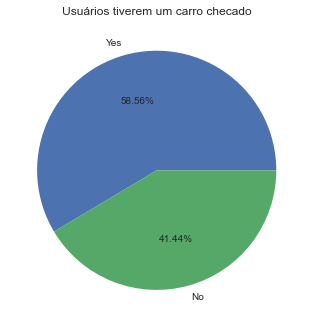

In [59]:
# Gráfico
plt.pie(df['FLAG_OWN_CAR'].value_counts(),
        labels=['Yes', 'No'], autopct='%1.2f%%')
plt.title('Usuários tiverem um carro checado')
plt.show()


In [60]:
# Quantos clientes tem alguma propriedade ?
df['FLAG_OWN_REALTY'].value_counts()


Y    207657
N     96674
Name: FLAG_OWN_REALTY, dtype: int64

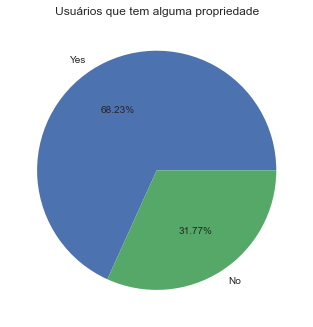

In [61]:
# Gráfico
plt.pie(df['FLAG_OWN_REALTY'].value_counts(),
        labels=['Yes', 'No'], autopct='%1.2f%%')
plt.title('Usuários que tem alguma propriedade')
plt.show()


In [62]:
# Categoria de renda
df['NAME_INCOME_TYPE'].value_counts()


Working                 190206
Commercial associate     84002
State servant            29975
Pensioner                  136
Student                     12
Name: NAME_INCOME_TYPE, dtype: int64

Text(0, 0.5, 'Categoria')

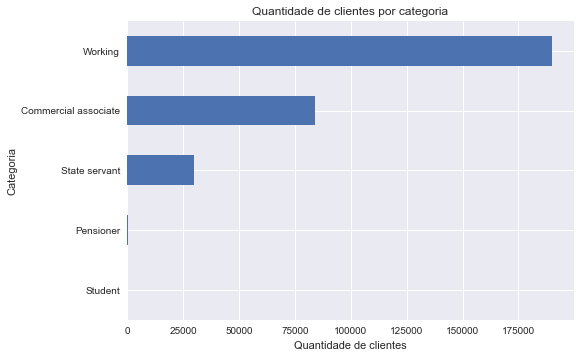

In [63]:
df["NAME_INCOME_TYPE"].value_counts().sort_values(
    ascending=True).plot.barh(title="Quantidade de clientes por categoria")
plt.xlabel("Quantidade de clientes")
plt.ylabel("Categoria")


In [64]:
# Nível de educação
df['NAME_EDUCATION_TYPE'].value_counts()


Secondary / secondary special    204779
Higher education                  85655
Incomplete higher                 11633
Lower secondary                    2039
Academic degree                     225
Name: NAME_EDUCATION_TYPE, dtype: int64

Text(0, 0.5, 'Nível de educação')

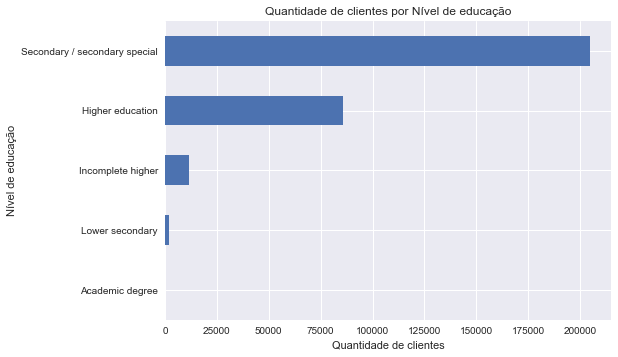

In [65]:
df["NAME_EDUCATION_TYPE"].value_counts().sort_values(ascending=True).plot.barh(
    title="Quantidade de clientes por Nível de educação")
plt.xlabel("Quantidade de clientes")
plt.ylabel("Nível de educação")


In [66]:
# Estado civil
df['NAME_FAMILY_STATUS'].value_counts()


Married                 212703
Single / not married     39647
Civil marriage           26799
Separated                18470
Widow                     6712
Name: NAME_FAMILY_STATUS, dtype: int64

Text(0, 0.5, 'Estado civil')

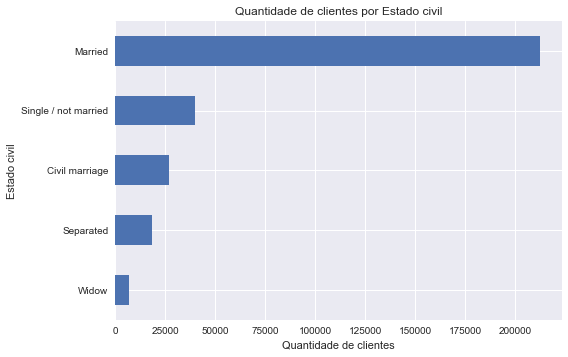

In [67]:
df["NAME_FAMILY_STATUS"].value_counts().sort_values(
    ascending=True).plot.barh(title="Quantidade de clientes por Estado civil")
plt.xlabel("Quantidade de clientes")
plt.ylabel("Estado civil")


In [68]:
# Número de filhos
df["CNT_CHILDREN"].describe()


count    304331.000000
mean          0.510967
std           0.765499
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

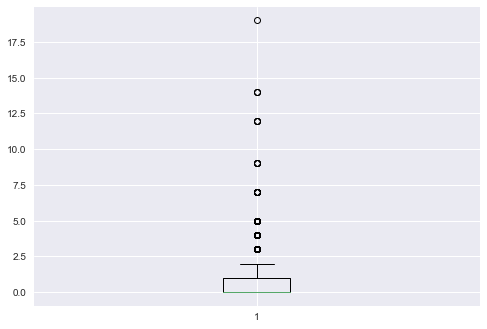

In [69]:
plt.boxplot(df["CNT_CHILDREN"])


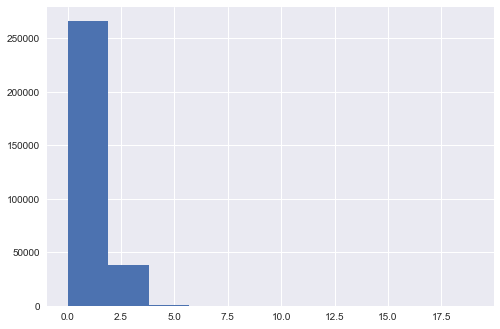

In [70]:
plt.hist(df["CNT_CHILDREN"])


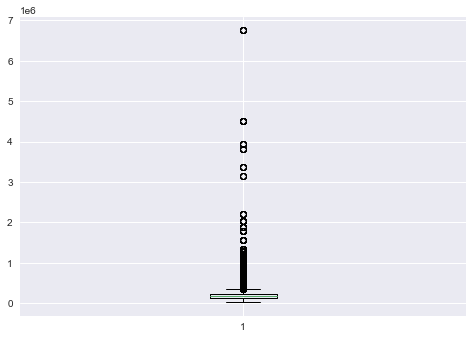

In [71]:
# Rendimento anual
plt.boxplot(df["AMT_INCOME_TOTAL"])


In [72]:
df["AMT_INCOME_TOTAL"].describe()


count    3.043310e+05
mean     1.948670e+05
std      1.169674e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Security staff'),
  Text(1, 0, 'Sales staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Laborers'),
  Text(4, 0, 'Managers'),
  Text(5, 0, 'Drivers'),
  Text(6, 0, 'Core staff'),
  Text(7, 0, 'High skill tech staff'),
  Text(8, 0, 'Cleaning staff'),
  Text(9, 0, 'Private service staff'),
  Text(10, 0, 'Cooking staff'),
  Text(11, 0, 'Low-skill Laborers'),
  Text(12, 0, 'Medicine staff'),
  Text(13, 0, 'Secretaries'),
  Text(14, 0, 'Waiters/barmen staff'),
  Text(15, 0, 'HR staff'),
  Text(16, 0, 'Realty agents'),
  Text(17, 0, 'IT staff')])

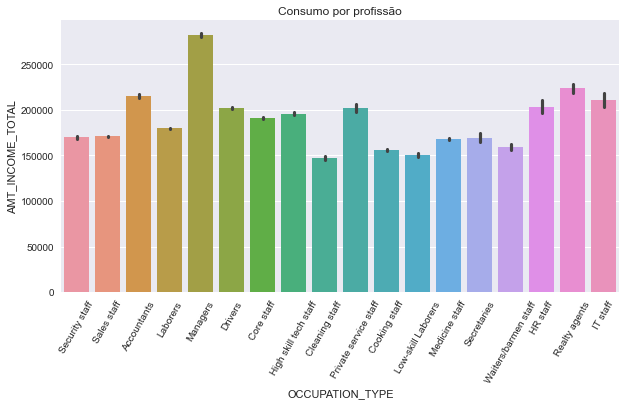

In [73]:
# Consumo por profissão
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="OCCUPATION_TYPE", y="AMT_INCOME_TOTAL",
                 data=df).set_title('Consumo por profissão')
plt.xticks(rotation=60)
